# Demystifying Gradient Descent: From Batch to Momentum – A Visual Guide

Gradient Descent (GD) is the powerhouse algorithm behind training most machine learning models, especially neural networks. At its core, GD iteratively tweaks model parameters (like weights) to minimize a loss function, which measures how far off your predictions are from reality. Think of it as descending a foggy mountain: you're searching for the lowest valley (minimum loss) by taking small steps in the direction of the steepest slope (negative gradient).
But not all GD flavors are created equal. The classic vanilla GD processes the entire dataset at once, which can be computationally brutal for big data. Enter variants like Stochastic GD (SGD), Mini-Batch GD, and SGD with Momentum – each trading off speed, noise, and stability for better real-world performance.
In this post, we'll break them down step-by-step with intuitive explanations, key equations, and visual charts (complete with Python code to recreate them using Matplotlib). Whether you're a newbie or a seasoned practitioner, these insights will sharpen your optimization toolkit. Let's dive in!

### 1. Batch Gradient Descent: The Methodical Giant

Batch Gradient Descent (also called Vanilla GD) is the OG – it computes the gradient using the entire dataset in one go. For each epoch (full pass through the data), you average the gradients across all samples before updating weights once. This gives a precise, stable direction but at a high computational cost.

#### Why It Works (and When It Doesn't)

Pros: Smooth convergence; low variance in updates (less noisy path down the mountain).
Cons: Memory-hungry (load everything!); slow for large datasets (one update per epoch).
Ideal for small datasets or when you have unlimited compute

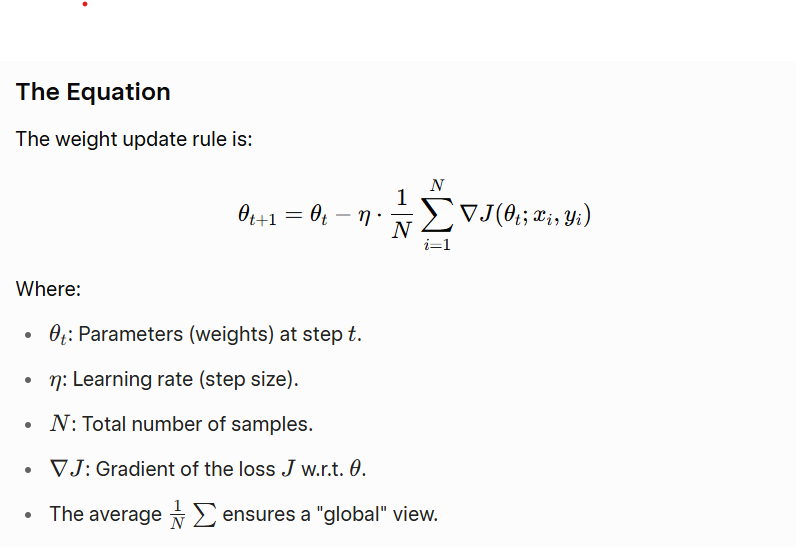

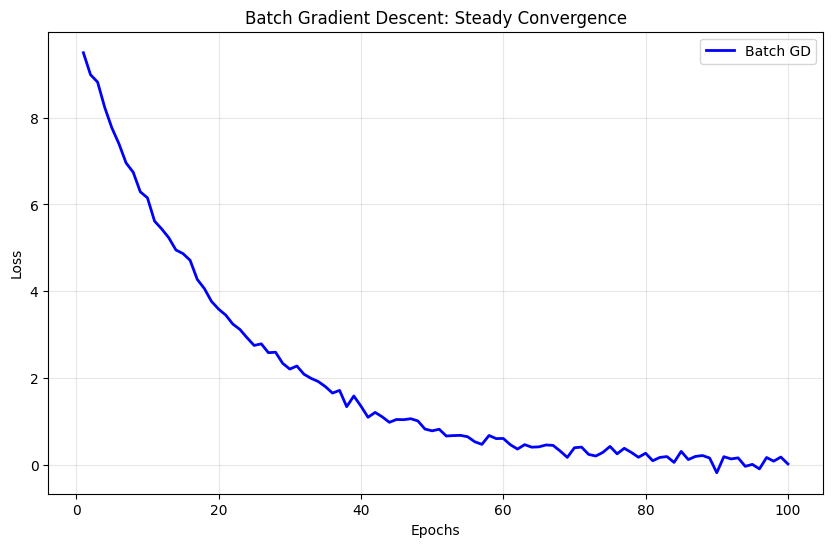

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate loss curves (epochs vs. loss)
epochs = np.arange(1, 101)
batch_loss = 10 * np.exp(-0.05 * epochs) + np.random.normal(0, 0.1, len(epochs))  # Smooth exponential decay

plt.figure(figsize=(10, 6))
plt.plot(epochs, batch_loss, label='Batch GD', color='blue', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent: Steady Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2. Stochastic Gradient Descent: The Chaotic Speedster

Stochastic Gradient Descent (SGD) flips the script: instead of the full dataset, it picks one random sample per update. You cycle through all samples in random order, updating weights N times per epoch. This randomness injects noise but accelerates training.

#### Why It Works (and When It Doesn't)

Pros: Fast updates (frequent tweaks); escapes local minima via noise; memory-efficient.
Cons: High variance (zig-zaggy path); noisy gradients can overshoot or oscillate.
Perfect for massive datasets where you can't afford full-batch waits.

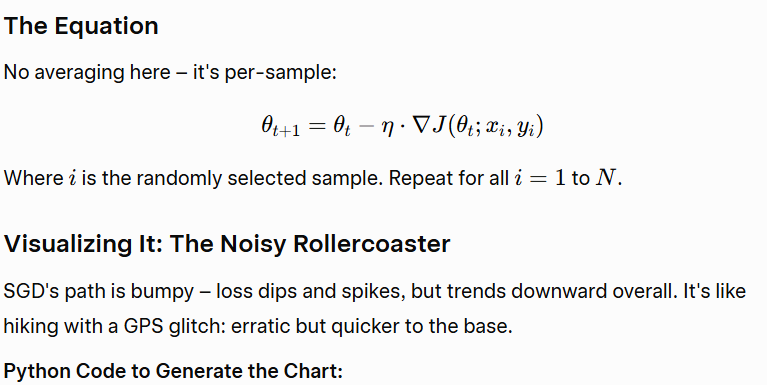

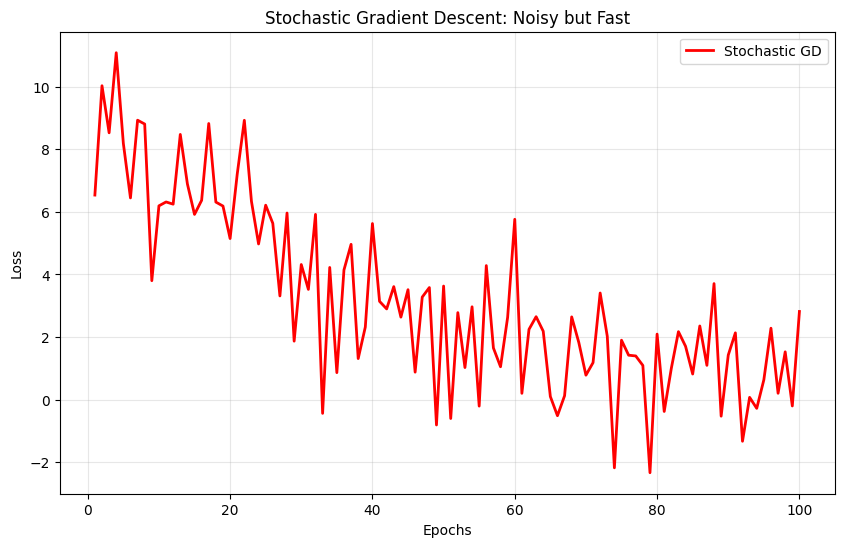

In [7]:
# Reuse imports from above
sgd_loss = 10 * np.exp(-0.03 * epochs) + np.random.normal(0, 1.5, len(epochs))  # Noisier decay

plt.figure(figsize=(10, 6))
plt.plot(epochs, sgd_loss, label='Stochastic GD', color='red', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent: Noisy but Fast')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

###  3. Mini-Batch Gradient Descent: The Balanced Compromise

Mini-Batch GD splits the difference: process small batches (e.g., 32–256 samples) at a time. Compute the average gradient per batch, update once per batch, and repeat until the epoch ends. It's the sweet spot for modern deep learning (thanks, GPUs!).

#### Why It Works (and When It Doesn't)

Pros: Balances speed and stability; parallelizable on hardware; less noise than SGD.

Cons: Batch size tuning required (too small → noisy; too large → slow).
The go-to for most practitioners – think TensorFlow/PyTorch defaults.

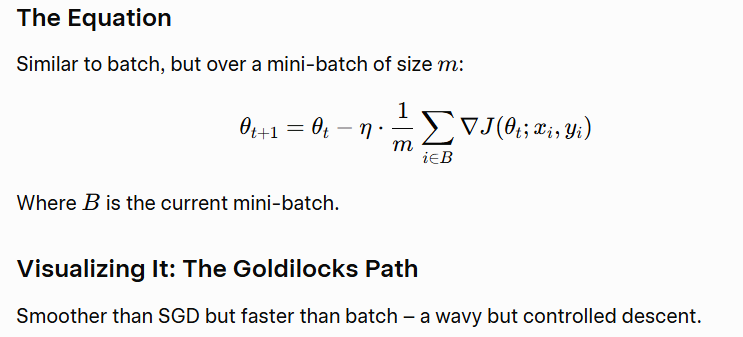

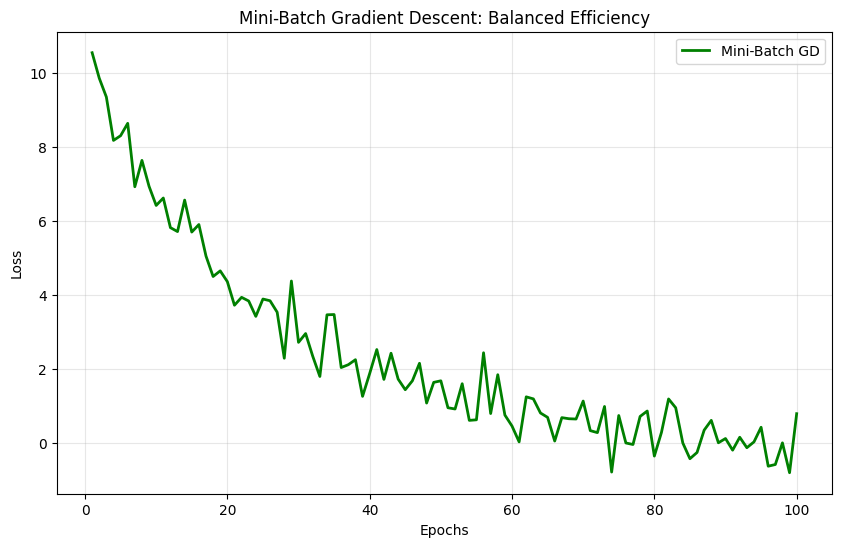

In [8]:
# Reuse imports
mini_loss = 10 * np.exp(-0.04 * epochs) + np.random.normal(0, 0.5, len(epochs))  # Moderate noise

plt.figure(figsize=(10, 6))
plt.plot(epochs, mini_loss, label='Mini-Batch GD', color='green', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Mini-Batch Gradient Descent: Balanced Efficiency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 4. SGD with Momentum: The Accelerated Rocket

Plain SGD can stall in flat regions or oscillate in ravines. Momentum adds "inertia" by accumulating a velocity vector from past gradients, accelerating in consistent directions while damping oscillations. It's like pushing a ball downhill – once rolling, it gains speed!

#### Why It Works (and When It Doesn't)

Pros: Faster convergence; overcomes local minima/plateaus; intuitive physics analogy.
Cons: Extra hyperparameter ($\beta$, momentum coefficient, often 0.9); can overshoot if $\eta$ is too high.
A staple in optimizers like Adam (which builds on this).

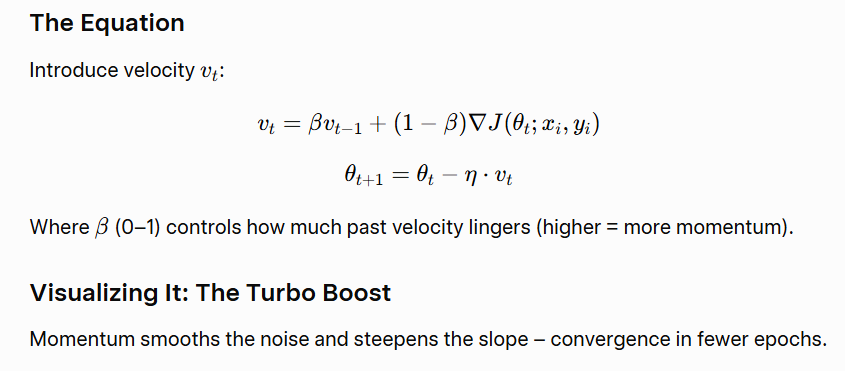

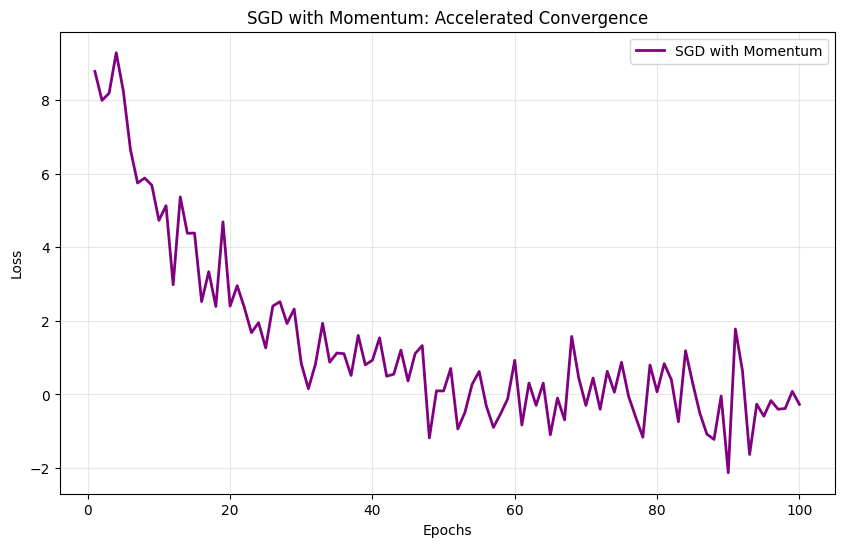

In [9]:
# Simulate momentum effect: smoother + faster decay
momentum_loss = 10 * np.exp(-0.06 * epochs) + np.random.normal(0, 0.8, len(epochs))  # Accelerated with some noise

plt.figure(figsize=(10, 6))
plt.plot(epochs, momentum_loss, label='SGD with Momentum', color='purple', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD with Momentum: Accelerated Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Comparing the Crew: A Side-by-Side Showdown

To see them shine (or stumble) together, plot all loss curves on one graph. Batch is reliable but pokey; SGD is wild; Mini-Batch is practical; Momentum is the MVP.

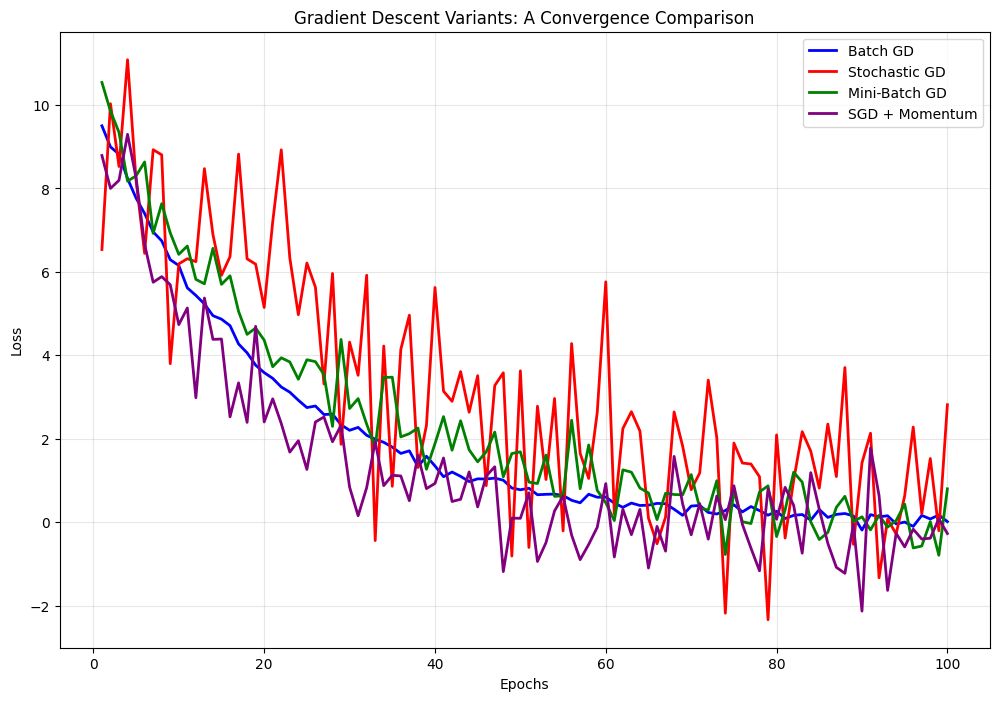

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, batch_loss, label='Batch GD', color='blue', linewidth=2)
plt.plot(epochs, sgd_loss, label='Stochastic GD', color='red', linewidth=2)
plt.plot(epochs, mini_loss, label='Mini-Batch GD', color='green', linewidth=2)
plt.plot(epochs, momentum_loss, label='SGD + Momentum', color='purple', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Gradient Descent Variants: A Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()